In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Original Data
train_ads = pd.read_csv('train_data_ads.csv')

In [ ]:
len(train_ads.columns)

35

In [ ]:
train_ads['label'].value_counts()

,count
label,
0,7556381
1,119136


In [ ]:
train_ads.shape

(7675517, 35)

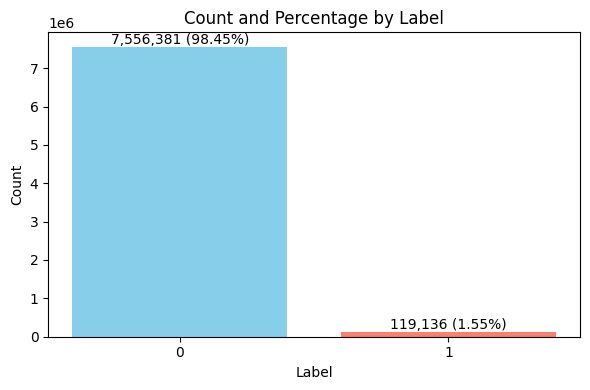

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['0', '1']
counts = [7556381, 119136]

# Calculate total and percentages
total = sum(counts)
percentages = [count / total * 100 for count in counts]

# Create bar plot
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, counts, color=['skyblue', 'salmon'])

# Annotate each bar with the count and percentage on the same line
for bar, count, pct in zip(bars, counts, percentages):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height,
        f'{count:,} ({pct:.2f}%)', ha='center', va='bottom'
    )

# Add labels and title
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Count and Percentage by Label')

plt.tight_layout()
plt.show()


In [ ]:
train_ads.shape

(7675517, 35)

# Feature selection

In [ ]:
train_ads.nunique().sort_values()

,0
site_id,1
label,2
app_score,3
gender,3
inter_type_cd,4
city_rank,4
net_type,6
series_group,7
u_feedLifeCycle,8
age,8


In [ ]:
drop_features = ['site_id', 'log_id', 'u_newsCatInterestsST', 'ad_click_list_v001','ad_click_list_v002',
                 'user_id','ad_click_list_v003','adv_id','task_id','pt_d', 'ad_close_list_v001',
                'ad_close_list_v002','ad_close_list_v003','device_size','adv_prim_id','city','device_name','spread_app_id']

In [ ]:
train_ads.drop(columns=drop_features, inplace=True)

In [ ]:
train_ads

,label,age,gender,residence,city_rank,series_dev,series_group,emui_dev,net_type,creat_type_cd,inter_type_cd,slot_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle
0,0,3,2,16,2,32,6,35,7,6,4,46,47,14,10.0,0,15
1,1,3,2,16,2,32,6,35,7,8,4,37,20,13,10.0,0,15
2,1,3,2,16,2,32,6,35,7,8,4,37,20,13,10.0,0,15
3,0,3,2,16,2,32,6,35,7,8,4,47,49,17,10.0,0,15
4,0,3,2,16,2,32,6,35,7,8,4,44,43,18,10.0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675512,0,6,4,33,3,27,2,11,7,5,3,65,18,23,0.0,7,17
7675513,0,6,4,33,3,27,2,11,7,10,4,16,49,17,10.0,7,17
7675514,0,6,4,33,3,27,2,11,7,4,3,22,18,23,0.0,7,17
7675515,1,6,4,33,3,27,2,11,7,8,5,65,47,14,10.0,7,17


In [ ]:
train_ads.to_csv('train_ads_minimal.csv', index=False)

In [ ]:
train_ads.columns

Index(['label', 'age', 'gender', 'residence', 'city_rank', 'series_dev',
       'series_group', 'emui_dev', 'net_type', 'creat_type_cd',
       'inter_type_cd', 'slot_id', 'hispace_app_tags', 'app_second_class',
       'app_score', 'u_refreshTimes', 'u_feedLifeCycle'],
      dtype='object')

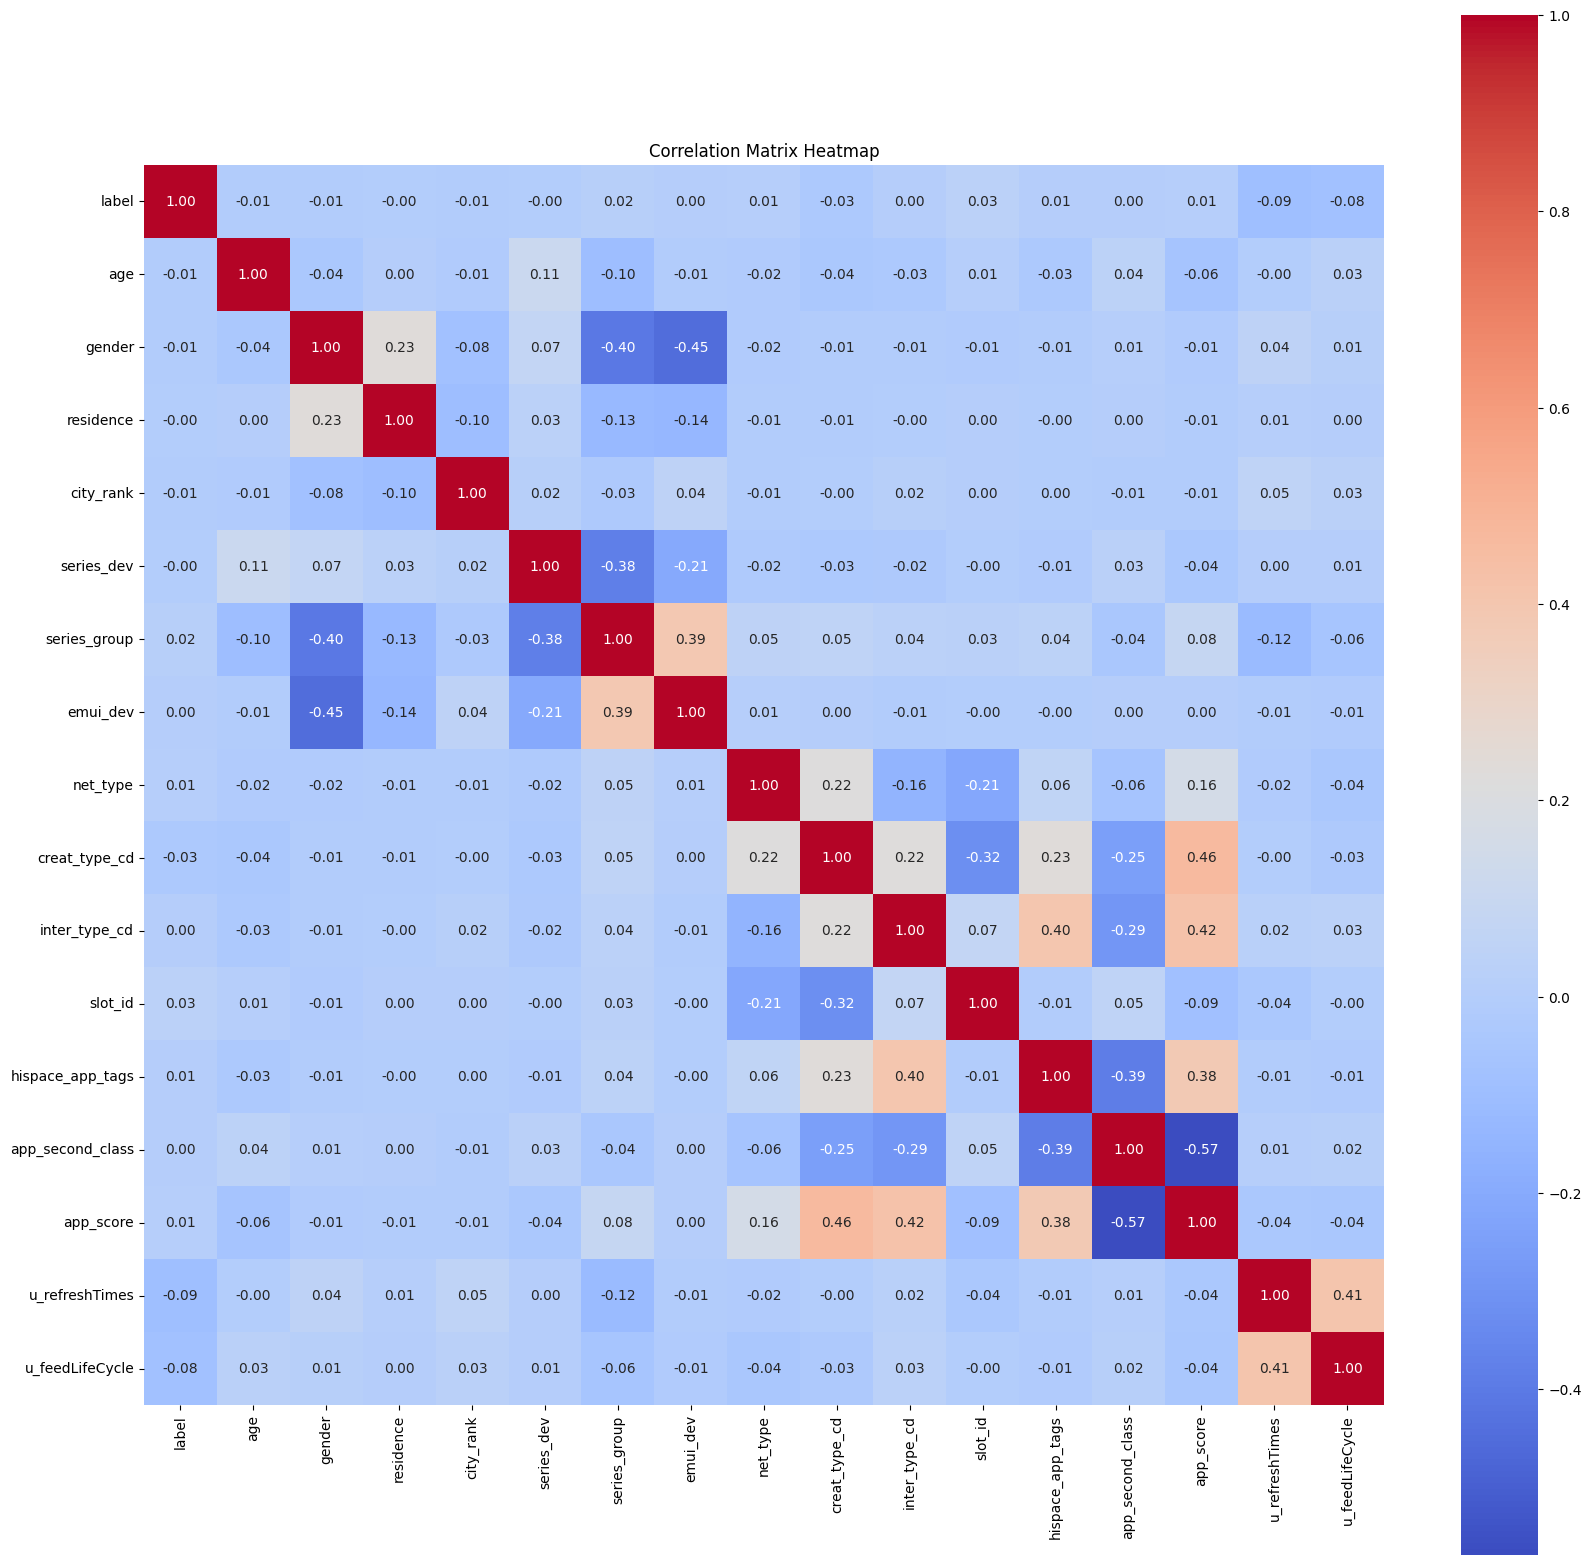

In [ ]:
# Calculate the correlation matrix
corr_matrix = train_ads.corr()
# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Subset Data into only lable = 1 and 17 features

In [ ]:
train_ads_label1 = train_ads[train_ads['label'] == 1]

In [ ]:
train_ads_label1.to_csv('train_ads_label1_17features.csv', index=False)

 Original Data label counts of 0 and 1 are 7556381 and 119136.
 Our goal is to synthetic label 1 more like 119136.
